In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./Data/haar_random_2qubit_states.csv')
df.head()

,Re_rho_00,Re_rho_01,Re_rho_02,Re_rho_03,Re_rho_10,Re_rho_11,Re_rho_12,Re_rho_13,Re_rho_20,Re_rho_21,Re_rho_22,Re_rho_23,Re_rho_30,Re_rho_31,Re_rho_32,Re_rho_33
0,0.048657,-0.002235,-0.007755,0.093072,-0.002235,0.011930,-0.074111,-0.062972,-0.007755,-0.074111,0.470097,0.354724,0.093072,-0.062972,0.354724,0.469316
1,0.035057,-0.090191,-0.025110,0.010380,-0.090191,0.497040,0.383155,0.103445,-0.025110,0.383155,0.400910,0.149014,0.010380,0.103445,0.149014,0.066993
2,0.388144,-0.079389,0.124571,-0.080437,-0.079389,0.018310,-0.036759,-0.014936,0.124571,-0.036759,0.101387,0.145060,-0.080437,-0.014936,0.145060,0.492159
3,0.109275,0.019094,0.164297,-0.219022,0.019094,0.016195,0.007956,-0.082919,0.164297,0.007956,0.280512,-0.257250,-0.219022,-0.082919,-0.257250,0.594018
4,0.004882,-0.044025,-0.032154,0.006419,-0.044025,0.552681,0.193117,0.100919,-0.032154,0.193117,0.272008,-0.141057,0.006419,0.100919,-0.141057,0.170429


In [8]:
X = df

In [9]:
X_values = X.values

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_values)

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

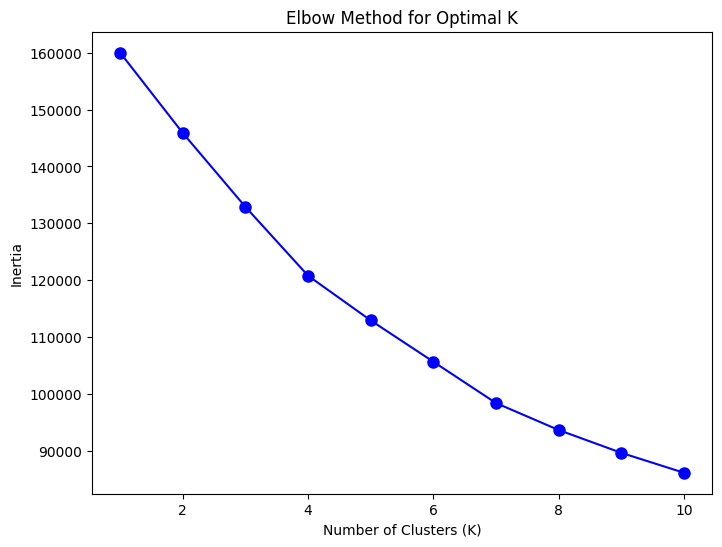

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [12]:
print("Dataset with cluster labels:")
print(df.head())
print(f"Cluster counts:\n{df['Cluster'].value_counts()}")

Dataset with cluster labels:
   Re_rho_00  Re_rho_01  Re_rho_02  Re_rho_03  Re_rho_10  Re_rho_11  \
0   0.048657  -0.002235  -0.007755   0.093072  -0.002235   0.011930   
1   0.035057  -0.090191  -0.025110   0.010380  -0.090191   0.497040   
2   0.388144  -0.079389   0.124571  -0.080437  -0.079389   0.018310   
3   0.109275   0.019094   0.164297  -0.219022   0.019094   0.016195   
4   0.004882  -0.044025  -0.032154   0.006419  -0.044025   0.552681   

   Re_rho_12  Re_rho_13  Re_rho_20  Re_rho_21  Re_rho_22  Re_rho_23  \
0  -0.074111  -0.062972  -0.007755  -0.074111   0.470097   0.354724   
1   0.383155   0.103445  -0.025110   0.383155   0.400910   0.149014   
2  -0.036759  -0.014936   0.124571  -0.036759   0.101387   0.145060   
3   0.007956  -0.082919   0.164297   0.007956   0.280512  -0.257250   
4   0.193117   0.100919  -0.032154   0.193117   0.272008  -0.141057   

   Re_rho_30  Re_rho_31  Re_rho_32  Re_rho_33  Cluster  
0   0.093072  -0.062972   0.354724   0.469316        0  
1  

In [13]:
df.to_csv("./Data/Clustered_data.csv", index=False)

In [17]:
import joblib
joblib.dump(kmeans, 'Model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']